## Research question 3
Does the quality of family relationships, parents' cohabitation status have an impact on alcohol consumption?

selected columns::
[['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']]

In [29]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import set_config
set_config(transform_output = "pandas")

In [31]:
# Import train and test sets
X_train = pd.read_csv('smoteTrainSet.csv')
X_test = pd.read_csv('ScaledTestSet.csv')

In [32]:
X_train.shape

(892, 43)

In [33]:
# Separate target from dataset
y_train = X_train['alc']
X_train = X_train.drop(columns = 'alc')
#X_train = X_train [['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']] 
y_test = X_test['alc']
#X_test = X_test [['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']]
X_test = X_test.drop(columns = 'alc')

In [34]:
X_train.shape

(892, 42)

## 0R classifier

In [35]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = "most_frequent")



In [36]:
dummy.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [37]:
from sklearn.metrics import accuracy_score
print('Train Accuracy', accuracy_score(y_train, dummy.predict(X_train)))
print('Test Accuracy', accuracy_score(y_test, dummy.predict(X_test)))

Train Accuracy 0.5
Test Accuracy 0.5502392344497608


## KNN Classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [39]:
# Predicting Alcohol Consumption
y_pred = knn.predict(X_test)

In [40]:
pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

,y_test,y_pred
0,0.0,0.0
1,0.0,0.0
2,0.0,1.0
3,0.0,0.0
4,0.0,0.0
...,...,...
204,1.0,0.0
205,1.0,1.0
206,0.0,1.0
207,0.0,0.0


In [41]:
# !pip install scikit-plot


In [42]:
import scikitplot as skplt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print('Test Accuracy ', accuracy_score(y_test, y_pred ))

Test Accuracy  0.6746411483253588


              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94       115
         1.0       0.93      0.94      0.93        94

    accuracy                           0.94       209
   macro avg       0.94      0.94      0.94       209
weighted avg       0.94      0.94      0.94       209



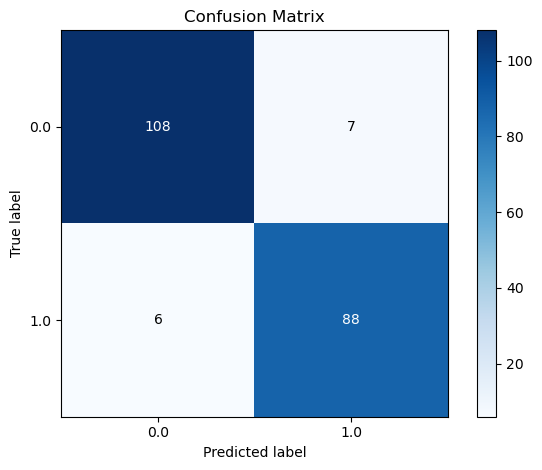

In [86]:
print(classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for KNN q3')

## Decision Tree

In [45]:
from matplotlib import pyplot as plt
from sklearn import tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print('Accuracy ', accuracy_score(y_test, dt.predict(X_test)).round(3))

Accuracy  0.967


fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=X_train.columns.values.tolist(),  
                   class_names=y_train.name,
                   filled=True)

fig.savefig("decistion_tree.png")


In [47]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Max Depth =  1 , Train Acc. =  0.639 , Test Acc. =  0.651
Max Depth =  2 , Train Acc. =  0.642 , Test Acc. =  0.617
Max Depth =  3 , Train Acc. =  0.694 , Test Acc. =  0.689
Max Depth =  4 , Train Acc. =  0.729 , Test Acc. =  0.727
Max Depth =  5 , Train Acc. =  0.775 , Test Acc. =  0.761
Max Depth =  6 , Train Acc. =  0.837 , Test Acc. =  0.818
Max Depth =  7 , Train Acc. =  0.887 , Test Acc. =  0.88
Max Depth =  8 , Train Acc. =  0.92 , Test Acc. =  0.9
Max Depth =  9 , Train Acc. =  0.963 , Test Acc. =  0.938
Max Depth =  10 , Train Acc. =  0.981 , Test Acc. =  0.943
Max Depth =  11 , Train Acc. =  0.991 , Test Acc. =  0.962
Max Depth =  12 , Train Acc. =  0.997 , Test Acc. =  0.976
Max Depth =  13 , Train Acc. =  0.999 , Test Acc. =  0.962
Max Depth =  14 , Train Acc. =  0.999 , Test Acc. =  0.962
Max Depth =  15 , Train Acc. =  0.999 , Test Acc. =  0.957
Max Depth =  16 , Train Acc. =  1.0 , Test Acc. =  0.962
Max Depth =  17 , Train Acc. =  1.0 , Test Acc. =  0.957
Max Depth =  1

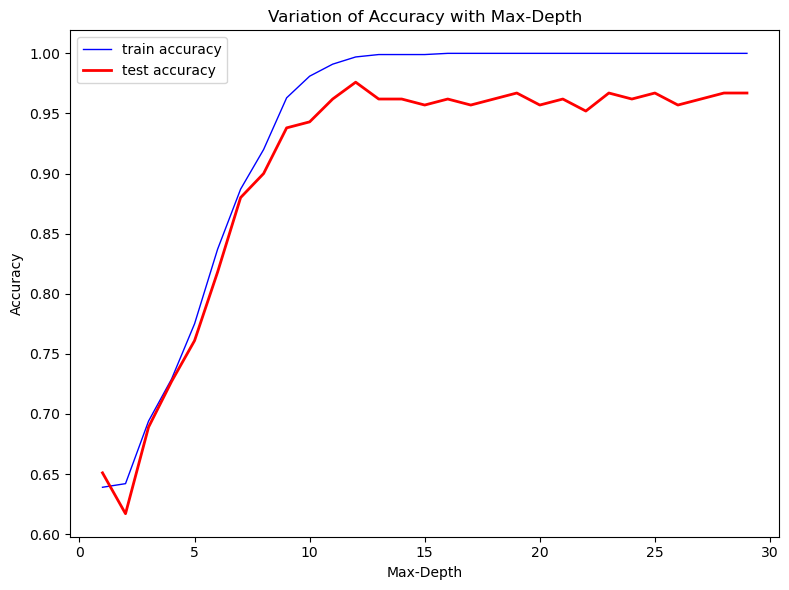

In [48]:
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();

In [49]:
# Confusion matrix for train set
print("Confusion Matrix for Train Set")
pd. DataFrame (confusion_matrix(y_train, dt.predict(X_train)))


Confusion Matrix for Train Set


,0,1
0,446,0
1,0,446


In [55]:
# Confusion matrix for test set
print("Confusion Matrix for Test Set")
pd. DataFrame (confusion_matrix(y_test, dt.predict(X_test)))

Confusion Matrix for Test Set


,0,1
0,113,2
1,5,89


In [56]:
print("Classification Report for Train Set")
print(classification_report (y_train, dt.predict(X_train).round (3)))

Classification Report for Train Set
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       446
         1.0       1.00      1.00      1.00       446

    accuracy                           1.00       892
   macro avg       1.00      1.00      1.00       892
weighted avg       1.00      1.00      1.00       892



In [57]:
print("Classification Report for Test Set")
print(classification_report(y_test, dt.predict (X_test). round(3)))

Classification Report for Test Set
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       115
         1.0       0.98      0.95      0.96        94

    accuracy                           0.97       209
   macro avg       0.97      0.96      0.97       209
weighted avg       0.97      0.97      0.97       209



## Hyperparameter Tuning on Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [59]:
param_grid= {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 30, 100],
    'max_features': [None, 'sqrt', 'log2']
}

In [60]:
rf_grid = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 30, 100],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]},
             verbose=2)

In [61]:
# Finding out the best estimator
best_grid = grid_search_rf.best_estimator_
best_grid

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=50)

In [62]:
best_grid.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=50)

In [63]:
best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[76 39]
 [29 65]]
Accuracy Score 0.6746411483253588
Classification report:               precision    recall  f1-score   support

         0.0       0.72      0.66      0.69       115
         1.0       0.62      0.69      0.66        94

    accuracy                           0.67       209
   macro avg       0.67      0.68      0.67       209
weighted avg       0.68      0.67      0.68       209



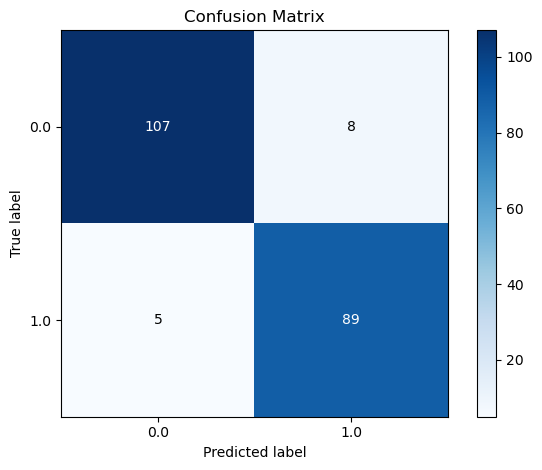

In [78]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Random forest hyper-para tuned q3')

## Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

[[112   3]
 [  3  91]]
0.9712918660287081
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       115
         1.0       0.97      0.97      0.97        94

    accuracy                           0.97       209
   macro avg       0.97      0.97      0.97       209
weighted avg       0.97      0.97      0.97       209



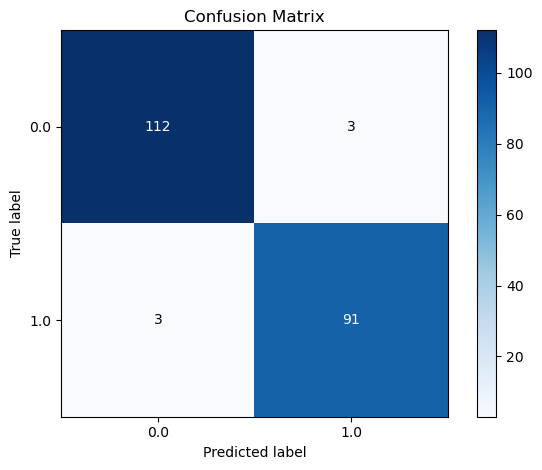

In [79]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
skplt.metrics.plot_confusion_matrix(y_test, prediction);
save_fig('Confusion Matrix for Random forest q3')
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

## Reshaping (Not Necessary)

 y_train.values.reshape(-1, 1)

X_train.values

## Hyperparameter Tuning on KNN

In [66]:
from sklearn.model_selection import GridSearchCV


In [67]:
param_grid = {
    'n_neighbors' : [5, 10, 25, 50],
    'weights' : ['uniform', 'distance']
}


In [68]:
knn_grid = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_knn.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 25, 50],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [69]:
best_grid = grid_search_knn.best_estimator_

In [70]:
best_grid

KNeighborsClassifier(n_neighbors=10, weights='distance')

[[113   2]
 [ 10  84]]
Accuracy Score 0.9425837320574163
Classification report:               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       115
         1.0       0.98      0.89      0.93        94

    accuracy                           0.94       209
   macro avg       0.95      0.94      0.94       209
weighted avg       0.94      0.94      0.94       209



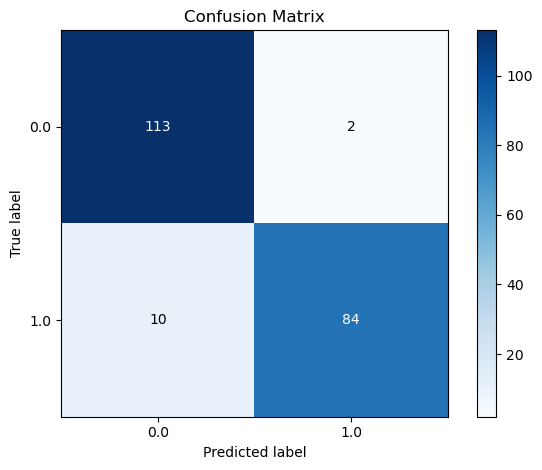

In [80]:
best_grid.fit(X_train, y_train)
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for KNN hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on Decision Tree

In [72]:
param_grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [5, 10, 15, 30],
    'max_features' : ['auto', 'sqrt']
}

In [73]:
dt_grid = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator=dt_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_dt.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15, 30],
                         'max_features': ['auto', 'sqrt'],
                         'splitter': ['best', 'random']},
             verbose=2)

In [74]:
best_grid = grid_search_dt.best_estimator_
best_grid

DecisionTreeClassifier(max_depth=30, max_features='sqrt', splitter='random')

[[108   7]
 [  6  88]]
Accuracy Score 0.937799043062201
Classification report:               precision    recall  f1-score   support

         0.0       0.95      0.94      0.94       115
         1.0       0.93      0.94      0.93        94

    accuracy                           0.94       209
   macro avg       0.94      0.94      0.94       209
weighted avg       0.94      0.94      0.94       209



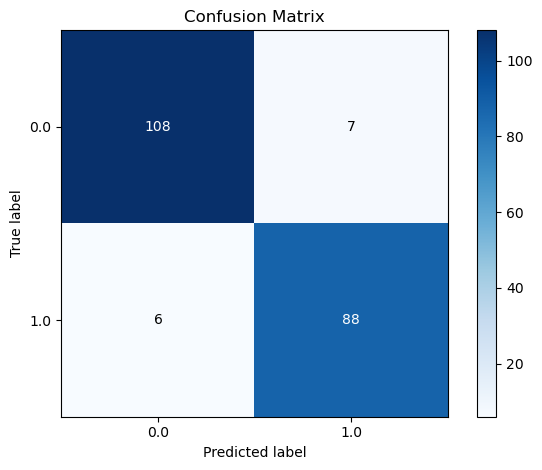

In [85]:
best_grid.fit(X_train, y_train)
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Descision_Tree hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Max Depth =  1 , Train Acc. =  0.639 , Test Acc. =  0.651
Max Depth =  2 , Train Acc. =  0.642 , Test Acc. =  0.617
Max Depth =  3 , Train Acc. =  0.694 , Test Acc. =  0.689
Max Depth =  4 , Train Acc. =  0.729 , Test Acc. =  0.727
Max Depth =  5 , Train Acc. =  0.775 , Test Acc. =  0.761
Max Depth =  6 , Train Acc. =  0.837 , Test Acc. =  0.818
Max Depth =  7 , Train Acc. =  0.886 , Test Acc. =  0.885
Max Depth =  8 , Train Acc. =  0.922 , Test Acc. =  0.9
Max Depth =  9 , Train Acc. =  0.964 , Test Acc. =  0.943
Max Depth =  10 , Train Acc. =  0.985 , Test Acc. =  0.952
Max Depth =  11 , Train Acc. =  0.994 , Test Acc. =  0.971
Max Depth =  12 , Train Acc. =  0.997 , Test Acc. =  0.967
Max Depth =  13 , Train Acc. =  0.999 , Test Acc. =  0.957
Max Depth =  14 , Train Acc. =  0.999 , Test Acc. =  0.967
Max Depth =  15 , Train Acc. =  0.999 , Test Acc. =  0.962
Max Depth =  16 , Train Acc. =  1.0 , Test Acc. =  0.967
Max Depth =  17 , Train Acc. =  1.0 , Test Acc. =  0.962
Max Depth = 

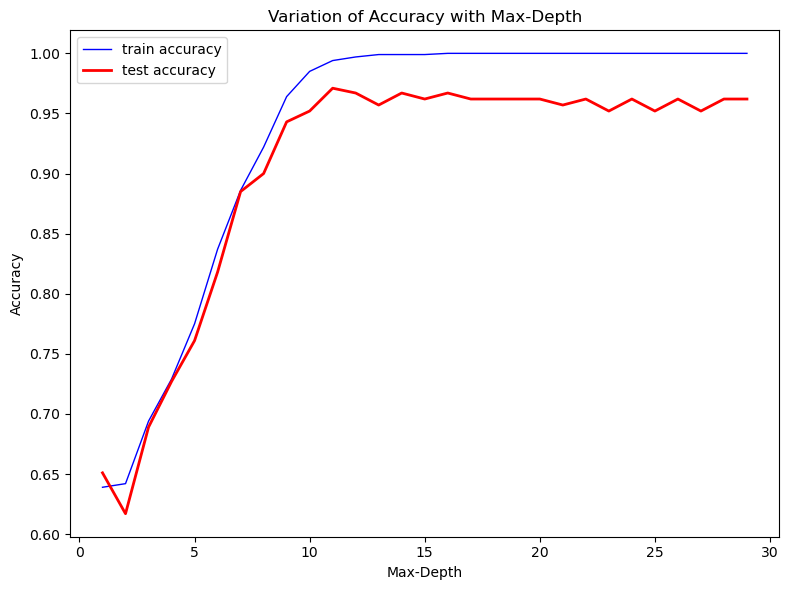

In [76]:
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();